# Data Exploration Exercise
---
This is an open-ended exercise to explore a given data set.

The data is taken from the [OECD Better Life Index](https://stats.oecd.org/Index.aspx?DataSetCode=BLI)

In [60]:
import pandas as pd

bli = pd.read_csv("bli.csv")
bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


The data in the file is already in a tidy form, though the website shows a more concise view of the data which you may find helpful.

### Task 1
Do men and women report the same degree of life satisfaction?

*Hint*: Start by making a list of the available values for **Indicator**.

In [63]:
sorted( bli['Indicator'].unique() )

['Air pollution',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Feeling safe walking alone at night',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net wealth',
 'Housing expenditure',
 'Labour market insecurity',
 'Life expectancy',
 'Life satisfaction',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Stakeholder engagement for developing regulations',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education']

There is a measure for 'Life satisfaction' so we can do a query to retriev only these rows:

In [65]:
data = bli.query("Indicator == 'Life satisfaction'")
data

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1722,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
1723,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.2,NaN,NaN
1724,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.8,NaN,NaN
1725,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.0,NaN,NaN
1726,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.3,NaN,NaN
2359,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,MN,Men,AVSCORE,Average score,0,Units,NaN,NaN,6.2,NaN,NaN
2360,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,WMN,Women,AVSCORE,Average score,0,Units,NaN,NaN,6.5,NaN,NaN
2361,CRI,Costa Rica,SW_LIFS,Life satisfaction,L,Value,HGH,High,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN


In [31]:

data = bli.query("Indicator == 'Life satisfaction' and Inequality in ['Men','Women']")
data = data[['Country','Inequality','Value']].sort_values('Country')
data
  

,Country,Inequality,Value
1761,Australia,Men,7.1
1800,Australia,Women,7.2
1762,Austria,Men,7.1
1801,Austria,Women,7.3
1802,Belgium,Women,6.8
...,...,...,...
1827,Türkiye,Women,5.4
1789,United Kingdom,Men,6.7
1828,United Kingdom,Women,6.9
1829,United States,Women,7.1


In [36]:
reshaped = data.pivot(index='Country',columns='Inequality',values='Value')

In [43]:
reshaped

Inequality,Men,Women
Country,,
Australia,7.1,7.2
Austria,7.1,7.3
Belgium,6.9,6.8
Brazil,6.2,6.0
Canada,7.0,7.0
Chile,6.2,6.1
Colombia,5.7,5.7
Costa Rica,6.2,6.5
Czech Republic,6.9,6.9


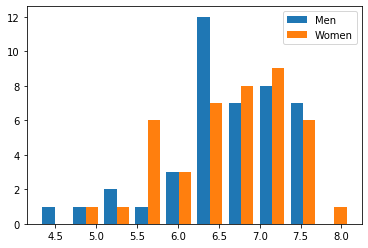

In [54]:
import matplotlib.pyplot as plt
plt.hist([reshaped.Men, reshaped.Women],label=['Men','Women'])
plt.legend()
plt.show()

In [50]:
from scipy.stats import ttest_ind
ttest_ind(reshaped.Men,reshaped.Women)

Ttest_indResult(statistic=-0.3108427014995509, pvalue=0.7567089919054105)

In [53]:
from scipy.stats import ttest_rel
ttest_rel(reshaped.Men,reshaped.Women)

Ttest_relResult(statistic=-1.0046783881125554, pvalue=0.32094459935715836)


Consider the kinds of summary statistics, visualisations and hypothesis tests that would be interesting.